Importar datos y modelo base de keras para ejecutar RetinaNet



In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git


Cloning into 'keras-retinanet'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 6205 (delta 1), reused 3 (delta 1), pack-reused 6196
Receiving objects: 100% (6205/6205), 13.48 MiB | 33.66 MiB/s, done.
Resolving deltas: 100% (4196/4196), done.


In [ ]:
%cd keras-retinanet/

!pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp36-cp36m-linux_x86_64.whl size=168072 sha256=14169c4856e923389de24115604503a2d2786ed6e95b58a6501ba699ede415fc
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20487 sha256=16e1a49d423d42fe9d24623739ba32a0521f0d0ae1f08478add8951a587cfb20
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-retinanet keras-resnet


In [ ]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/keras_retinanet
creating build/temp.linux-x86_64-3.6/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -c keras_retinanet/utils/compute_overlap.c -o build/temp.linux-x86_64-3.6/keras_retinanet/utils/compute_over

In [ ]:
import os
import shutil
import zipfile
import urllib
import urllib.request
import xml.etree.ElementTree as ET
import numpy as np
import csv
import pandas

Mounted at /content/drive


In [ ]:
!git clone https://github.com/RomRoc/objdet_fizyr_colab.git

Cloning into 'objdet_fizyr_colab'...
remote: Enumerating objects: 13, done.
remote: Total 13 (delta 0), reused 0 (delta 0), pack-reused 13
Unpacking objects: 100% (13/13), done.


In [ ]:
!pwd

/content/keras-retinanet


A este punto deberías estar dentro de la carpeta "keras-retinanet"


In [ ]:
!cp "../drive/My Drive/data2.zip" "./dataset.zip"

Aquí va la dirección en donde tengas el zip de tu set de datos, o tener tu dataset ya dentro del directorio de "keras-retinanet

In [ ]:
DATASET_DIR = 'dataset'
DRIVE_ID = 'dataset'
file_name = DRIVE_ID + '.zip'

os.makedirs(DATASET_DIR, exist_ok=True)
with zipfile.ZipFile(file_name, 'r') as zip_ref:
  zip_ref.extractall(DATASET_DIR)
os.remove(file_name)
print('Extract completed!')

Extract completed!


En la siguiente celda el DATASET_DIR es de donde sacará los datos de entrenamiento dentro de tu zip del dataset

In [ ]:
DATASET_DIR = 'dataset/export/'
ANNOTATIONS_FILE = 'annotations.csv'
CLASSES_FILE = 'classes.csv'
annotations = []
classes = set([])

for xml_file in [f for f in os.listdir(DATASET_DIR) if f.endswith(".xml")]:
  tree = ET.parse(os.path.join(DATASET_DIR, xml_file))
  root = tree.getroot()

  file_name = None

  for elem in root:
    if elem.tag == 'filename':
      file_name = os.path.join(DATASET_DIR, elem.text)

    if elem.tag == 'object':
      obj_name = None
      coords = []
      for subelem in elem:
        if subelem.tag == 'name':
          obj_name = subelem.text
        if subelem.tag == 'bndbox':
          for subsubelem in subelem:
            coords.append(subsubelem.text)
      item = [file_name] + coords + [obj_name]
      annotations.append(item)
      classes.add(obj_name)

with open(ANNOTATIONS_FILE, 'w') as f:
  writer = csv.writer(f)
  writer.writerows(annotations)

with open(CLASSES_FILE, 'w') as f:
  for i, line in enumerate(classes):
    f.write('{},{}\n'.format(line,i))

In [ ]:
PRETRAINED_MODEL = './snapshots/_pretrained_model.h5'

#### OPTION 1: DOWNLOAD INITIAL PRETRAINED MODEL FROM FIZYR ####
URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

#### OPTION 2: DOWNLOAD CUSTOM PRETRAINED MODEL FROM GOOGLE DRIVE. CHANGE DRIVE_MODEL VALUE. USE THIS TO CONTINUE PREVIOUS TRAINING EPOCHS ####
#drive.mount('/content/gdrive')
#DRIVE_MODEL = '/content/gdrive/My Drive/Colab Notebooks/objdet_tensorflow_colab/resnet50_csv_10.h5'
#shutil.copy(DRIVE_MODEL, PRETRAINED_MODEL)


print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to ./snapshots/_pretrained_model.h5


In [ ]:
!keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights {PRETRAINED_MODEL} --batch-size 20 --steps 140 --epochs 50 csv annotations.csv classes.csv

2020-11-02 13:42:07.534073: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Creating model, this may take a second...
2020-11-02 13:42:09.131662: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-02 13:42:09.169971: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-02 13:42:09.170572: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-11-02 13:42:09.170621: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-02 13:42:09.172485: I t

INFERENCIA

In [ ]:
THRES_SCORE = 0.226

# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%reload_ext autoreload
%autoreload 2

# import keras
import keras
import tensorflow.keras.backend as k

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
# k.set_session(get_session())

In [ ]:
model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
print(model_path)

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)

# load label to names mapping for visualization purposes
labels_to_names = pandas.read_csv(CLASSES_FILE,header=None).T.loc[0].to_dict()

snapshots/resnet50_csv_50.h5


In [ ]:
def img_inference(img_path):
  image = read_image_bgr(img_infer)

  # copy to draw on
  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  # preprocess image for network
  image = preprocess_image(image)
  image, scale = resize_image(image)

  # process image
  start = time.time()
  boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
  print("processing time: ", time.time() - start)

  # correct for image scale
  boxes /= scale

  # visualize detections
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
      # scores are sorted so we can break
      if score < THRES_SCORE:
          break

      color = label_color(label)

      b = box.astype(int)
      draw_box(draw, b, color=color)

      caption = "{} {:.3f}".format(labels_to_names[label], score)
      draw_caption(draw, b, caption)

  plt.figure(figsize=(10, 10))
  plt.axis('off')
  plt.imshow(draw)
  plt.show()

Running inference on: /content/keras-retinanet/pistola3.jpg
processing time:  0.14032816886901855


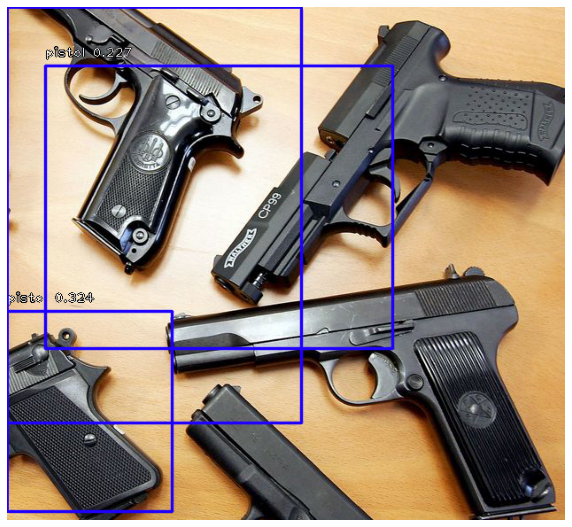

In [ ]:
#uploaded = files.upload()
img_infer = "/content/keras-retinanet/pistola3.jpg"

print('Running inference on: ' + img_infer)
img_inference(img_infer)

In [ ]:
model.get_weights()

[array([[[[ 3.17835435e-02, -8.54160171e-03, -9.91952978e-03, ...,
           -1.11105908e-02, -4.49597389e-02,  2.10922793e-03],
          [ 8.65099672e-03,  5.29229008e-02, -6.04753150e-03, ...,
            1.23209925e-02,  1.68406516e-02,  2.03143843e-02],
          [-1.64636527e-03, -5.12801521e-02, -1.40433656e-02, ...,
            2.65128771e-03,  2.45503783e-02,  1.02104424e-02]],
 
         [[ 2.11518817e-02, -7.39023648e-03, -5.40548610e-03, ...,
           -9.73012857e-03, -1.21135790e-05,  1.16689298e-02],
          [ 2.14881841e-02,  5.35310619e-02, -4.02634265e-03, ...,
            1.58958472e-02,  1.47694666e-02, -1.69336721e-02],
          [ 1.99116338e-02, -4.10506018e-02, -9.64337774e-03, ...,
            2.29021907e-03, -2.57118158e-02, -8.41396116e-03]],
 
         [[ 1.74625311e-02, -1.05967093e-02,  7.94856530e-03, ...,
           -3.79568106e-03,  6.99042948e-03, -1.88094401e-03],
          [ 3.82039584e-02,  5.73676527e-02,  7.28334486e-03, ...,
            1.458